<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/part_2_Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [60]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [61]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Time (days)')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [62]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [63]:
""" multiplier is a list of 1000 random number in (1,3) """

import random
multiplier = []
for i in range(1000):
    multiplier.append(random.uniform(1,3))
    


In [64]:
""" beta is (1,3) times of gamma values """
# Multiplying two lists 
beta = [] 
for i in range(1000): 
    beta.append(gamma[i] * multiplier[i]) 

In [65]:
""" P, Q, M are the list of S, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [66]:
Gamma = pd.DataFrame(gamma)

In [67]:
beta_list = []
for i in range(1000):
  beta_list.append(beta[i])  
Beta = pd.DataFrame(beta_list)    

In [68]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
I_value = pd.DataFrame(Q)
R_value = pd.DataFrame(M)

In [69]:
""" S_list, I_list, R_list are the list of S, I, R respectievely chosen for 1 random values of days for each of the rows and there are such 1000 rows, 
    hence, S_list, I_list, R_list is a list of 1000 items and each item itself list of 1 values 
    and S_next_list, I_next_list, R_next_list are list of S, I, R respectively for (day +1) value for each of 1 days for each of 1000 rows   """
S_list = []
S_next_list = []
I_list = []
I_next_list = []
R_list = []
R_next_list = []
for i in range(1000):
  p = sample(range(0, 99), 1)
  S_list.append(S_value[p].iloc[i].to_list())
  S_next_list.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_next_list.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_next_list.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [70]:
""" merging 1000 lists each of 1 items into a single list of 1000 item """

sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]

infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i] 

recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  
susnext_list = []
for i in range(1000):
 susnext_list = susnext_list+S_next_list[i]

infectednext_list = []
for i in range(1000):
 infectednext_list = infectednext_list+I_next_list[i]  

recovnext_list = []
for i in range(1000):
 recovnext_list = recovnext_list+R_next_list[i]


In [71]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susnext_list)
df_5 = pd.DataFrame(infectednext_list)
df_6 = pd.DataFrame(recovnext_list)


In [115]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta,Gamma], axis=1)
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6,7
0,265.018523,-3.708991e-10,734.981477,265.018523,-3.778852e-10,734.981477,1.696488,0.939660
1,999.000000,1.000000e+00,0.000000,994.276587,3.865900e+00,1.857513,2.234222,0.875667
2,349.037709,1.677480e+01,634.187490,342.733858,1.208701e+01,645.179136,1.273401,0.767967
3,142.168765,-4.872486e-10,857.831235,142.168765,-5.625172e-10,857.831235,1.593897,0.701270
4,123.574332,2.304646e-03,876.423364,123.574175,1.928542e-03,876.423897,0.602340,0.252597
...,...,...,...,...,...,...,...,...
995,952.442309,1.430749e+01,33.250198,943.406729,1.670210e+01,39.891171,0.615721,0.428973
996,66.255868,2.507260e-11,933.744132,66.255868,-2.714029e-10,933.744132,2.088861,0.718870
997,213.552481,4.786857e-01,785.968833,213.475783,3.723914e-01,786.151825,0.848574,0.432280
998,989.307423,3.140770e+00,7.551807,988.383519,3.340971e+00,8.275510,0.288380,0.223371


In [117]:
from sklearn import preprocessing
float_array = data[[0,1,2,3,4,5,6,7]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)

In [118]:
data_scaled = pd.DataFrame(scaled_array)
data_scaled

,0,1,2,3,4,5,6,7
0,0.218365,4.301202e-13,0.781868,0.218368,7.064714e-13,0.781865,0.579140,0.939691
1,1.000000,3.469481e-03,0.000000,0.994986,1.479238e-02,0.001964,0.762732,0.875683
2,0.307839,5.819985e-02,0.674644,0.301130,4.624941e-02,0.686333,0.434691,0.767958
3,0.087539,2.644799e-14,0.912554,0.087540,0.000000e+00,0.912553,0.544114,0.701247
4,0.067737,7.995926e-06,0.932332,0.067738,7.379327e-06,0.932332,0.205578,0.252470
...,...,...,...,...,...,...,...,...
995,0.950420,4.963957e-02,0.035371,0.940812,6.390850e-02,0.042424,0.210147,0.428887
996,0.006697,1.803937e-12,0.993310,0.006697,1.113913e-12,0.993310,0.713103,0.718851
997,0.163557,1.660791e-03,0.836108,0.163478,1.424909e-03,0.836300,0.289647,0.432195
998,0.989678,1.089684e-02,0.008034,0.988710,1.278381e-02,0.008791,0.098387,0.223238


In [119]:
X = data_scaled[[0,1,2,3,4,5]]
y = data_scaled[6]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
from sklearn.model_selection import train_test_split
X_dev, X_test_1, y_dev, y_test_1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [122]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
ddev = xgb.DMatrix(X_dev, label=y_dev)
dtest1 = xgb.DMatrix(X_test_1, label=y_test_1)

In [123]:
from sklearn.metrics import mean_absolute_error

In [124]:
#default values
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [125]:
#added evaluation matrix to param dictionary
params['eval_metric'] = "mae"

num_boost_round = 999


In [126]:
#gridsearch
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [127]:
#Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
[14:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.1094548 for 49 rounds
CV with max_depth=9, min_child_weight=6
[14:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1

In [129]:
params['max_depth'] = 9
params['min_child_weight'] = 6

In [130]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [131]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[14:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.10428960000000001 for 124 rounds
CV with subsample=1.0, colsample=0.9
[14:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederro

In [133]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [134]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'], early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
CV with eta=0.3
[14:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 3.05 s, sys: 31.6 ms, total: 3.08 s
Wall time: 1.6 s
	MAE 0.10428960000000001 for 124 rounds

CV with eta=0.2
[14:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:32] WARNING: /workspace/s

In [135]:
params['eta'] = .1

In [136]:
#training model using tuned parameters
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")],
    early_stopping_rounds=10
)

[14:22:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:0.245956
Will train until DEV-mae hasn't improved in 10 rounds.
[1]	DEV-mae:0.231508
[2]	DEV-mae:0.217804
[3]	DEV-mae:0.205527
[4]	DEV-mae:0.193949
[5]	DEV-mae:0.185253
[6]	DEV-mae:0.176513
[7]	DEV-mae:0.169051
[8]	DEV-mae:0.161764
[9]	DEV-mae:0.155126
[10]	DEV-mae:0.149632
[11]	DEV-mae:0.144489
[12]	DEV-mae:0.140738
[13]	DEV-mae:0.136338
[14]	DEV-mae:0.131802
[15]	DEV-mae:0.128459
[16]	DEV-mae:0.126305
[17]	DEV-mae:0.124183
[18]	DEV-mae:0.12162
[19]	DEV-mae:0.120188
[20]	DEV-mae:0.117862
[21]	DEV-mae:0.116448
[22]	DEV-mae:0.115325
[23]	DEV-mae:0.114421
[24]	DEV-mae:0.113277
[25]	DEV-mae:0.111933
[26]	DEV-mae:0.111251
[27]	DEV-mae:0.109923
[28]	DEV-mae:0.109609
[29]	DEV-mae:0.109163
[30]	DEV-mae:0.108359
[31]	DEV-mae:0.107735
[32]	DEV-mae:0.106974
[33]	DEV-mae:0.106409
[34]	DEV-mae:0.105967
[35]	DEV-mae:0.105585
[36]	DEV-mae:0.105209
[37]	DEV-mae:0.

In [137]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(ddev, "DEV")]
)

[14:22:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	DEV-mae:0.245956
[1]	DEV-mae:0.231508
[2]	DEV-mae:0.217804
[3]	DEV-mae:0.205527
[4]	DEV-mae:0.193949
[5]	DEV-mae:0.185253
[6]	DEV-mae:0.176513
[7]	DEV-mae:0.169051
[8]	DEV-mae:0.161764
[9]	DEV-mae:0.155126
[10]	DEV-mae:0.149632
[11]	DEV-mae:0.144489
[12]	DEV-mae:0.140738
[13]	DEV-mae:0.136338
[14]	DEV-mae:0.131802
[15]	DEV-mae:0.128459
[16]	DEV-mae:0.126305
[17]	DEV-mae:0.124183
[18]	DEV-mae:0.12162
[19]	DEV-mae:0.120188
[20]	DEV-mae:0.117862
[21]	DEV-mae:0.116448
[22]	DEV-mae:0.115325
[23]	DEV-mae:0.114421
[24]	DEV-mae:0.113277
[25]	DEV-mae:0.111933
[26]	DEV-mae:0.111251
[27]	DEV-mae:0.109923
[28]	DEV-mae:0.109609
[29]	DEV-mae:0.109163
[30]	DEV-mae:0.108359
[31]	DEV-mae:0.107735
[32]	DEV-mae:0.106974
[33]	DEV-mae:0.106409
[34]	DEV-mae:0.105967
[35]	DEV-mae:0.105585
[36]	DEV-mae:0.105209
[37]	DEV-mae:0.105105
[38]	DEV-mae:0.104576
[39]	DEV-mae:0.104465
[40]

In [138]:
mean_absolute_error(best_model.predict(ddev), y_dev_1)

0.09775602598281873

In [139]:
best_model.save_model("my_model.model")

In [140]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_model.model")
# And use it for predictions.
y_test_pred = loaded_model.predict(dtest1)
y_train_pred = loaded_model.predict(dtrain)

[14:22:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


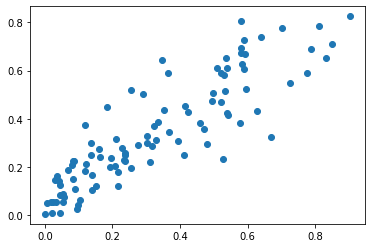

In [141]:
plt.scatter(y_test_1,y_test_pred)

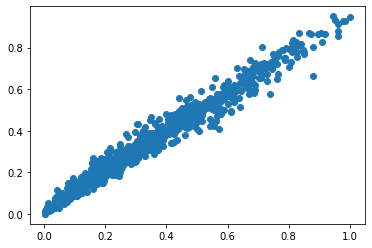

In [142]:
plt.scatter(y_train,y_train_pred)

In [143]:
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test_1, y_test_pred))
r2_test = r2_score(y_test_1, y_test_pred)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

print("\n")

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.04081779339003173
R2 score of training set is 0.9691033198748158


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.11593188696317032
R2 score of test set is 0.7596594591618416
